In [88]:
from school_analysis.preprocessing.load import Loader
import pandas as pd

loader = Loader()


# df_male = melted_df[['male', 'year']].rename(columns={'male': 'total'})
# df_female = melted_df[['female', 'year']].rename(columns={'female': 'total'})
# df_male['Gender'] = 'm'
# df_female['Gender'] = 'f'
# melted_df = pd.concat([df_male, df_female], ignore_index=True)


def load_special_edu_support_percentage(ignore_special_schools=False):
    
    melted_df = loader.load('students_with_special_educational_support')
    melted_df['year'] = pd.to_datetime(melted_df['year'], format='%Y')
    melted_df['total'] = pd.to_numeric(melted_df['total'], errors='coerce')
    melted_df['male'] = pd.to_numeric(melted_df['male'], errors='coerce')
    melted_df['female'] = pd.to_numeric(melted_df['female'], errors='coerce')

    if(ignore_special_schools):
        melted_df = melted_df[melted_df['school']!="Special schools"] #filter out because their amount is so hight, we can't see the evolution of the other schools

    total_over_years = melted_df.groupby(['year','school'], as_index=False)[['male','female']].sum()

    children_type = loader.load('school-children-by-type')
    children_type['male'] = pd.to_numeric(children_type['male'], errors='coerce')
    children_type['female'] = pd.to_numeric(children_type['female'], errors='coerce')
    children_type = children_type.rename(columns={'Year': 'year'})
    children_type = children_type.rename(columns={'School Type': 'school'})
    children_type = children_type.rename(columns={'total': 'Value'})
    children_type = children_type.rename(columns={'male': 'male_count'})
    children_type = children_type.rename(columns={'female': 'female_count'})
    children_type['year'] = pd.to_datetime(children_type['year'], format='%Y')
    children_type['Value'] = pd.to_numeric(children_type['Value'], errors='coerce')


    child_amount_per_year = children_type.groupby(['year','school'], as_index=False)[['male_count','female_count']].sum()

    merged_df = pd.merge(total_over_years, child_amount_per_year, on=['year', 'school'])
    merged_df['relative_male'] = merged_df['male']/merged_df['male_count'] 
    merged_df['relative_female'] = merged_df['female']/merged_df['female_count'] 
    return merged_df

merged_df = load_special_edu_support_percentage()

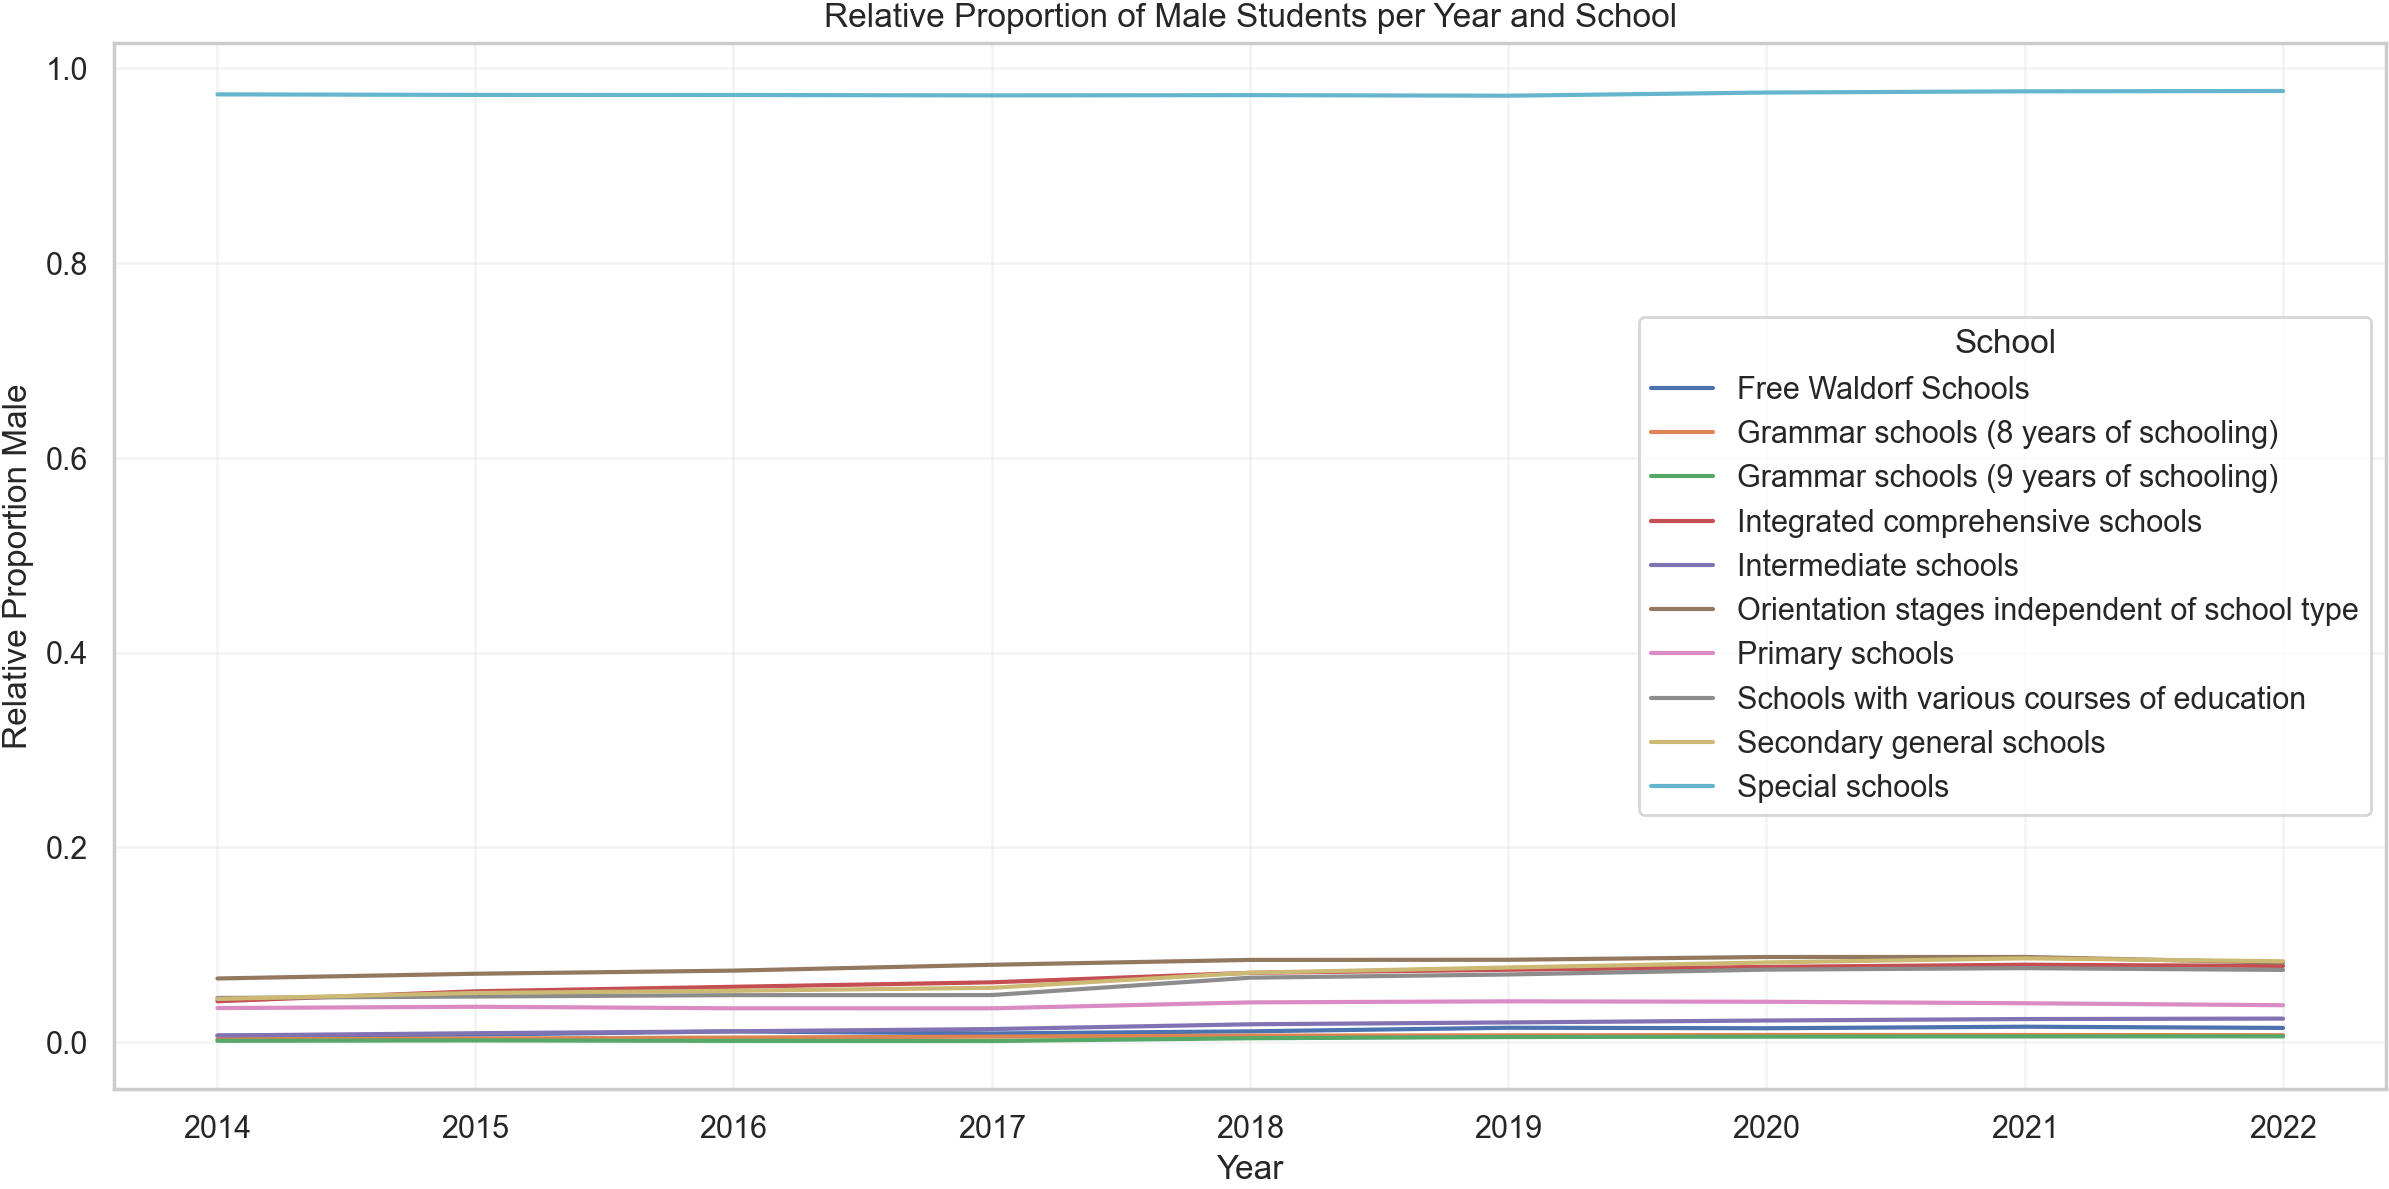

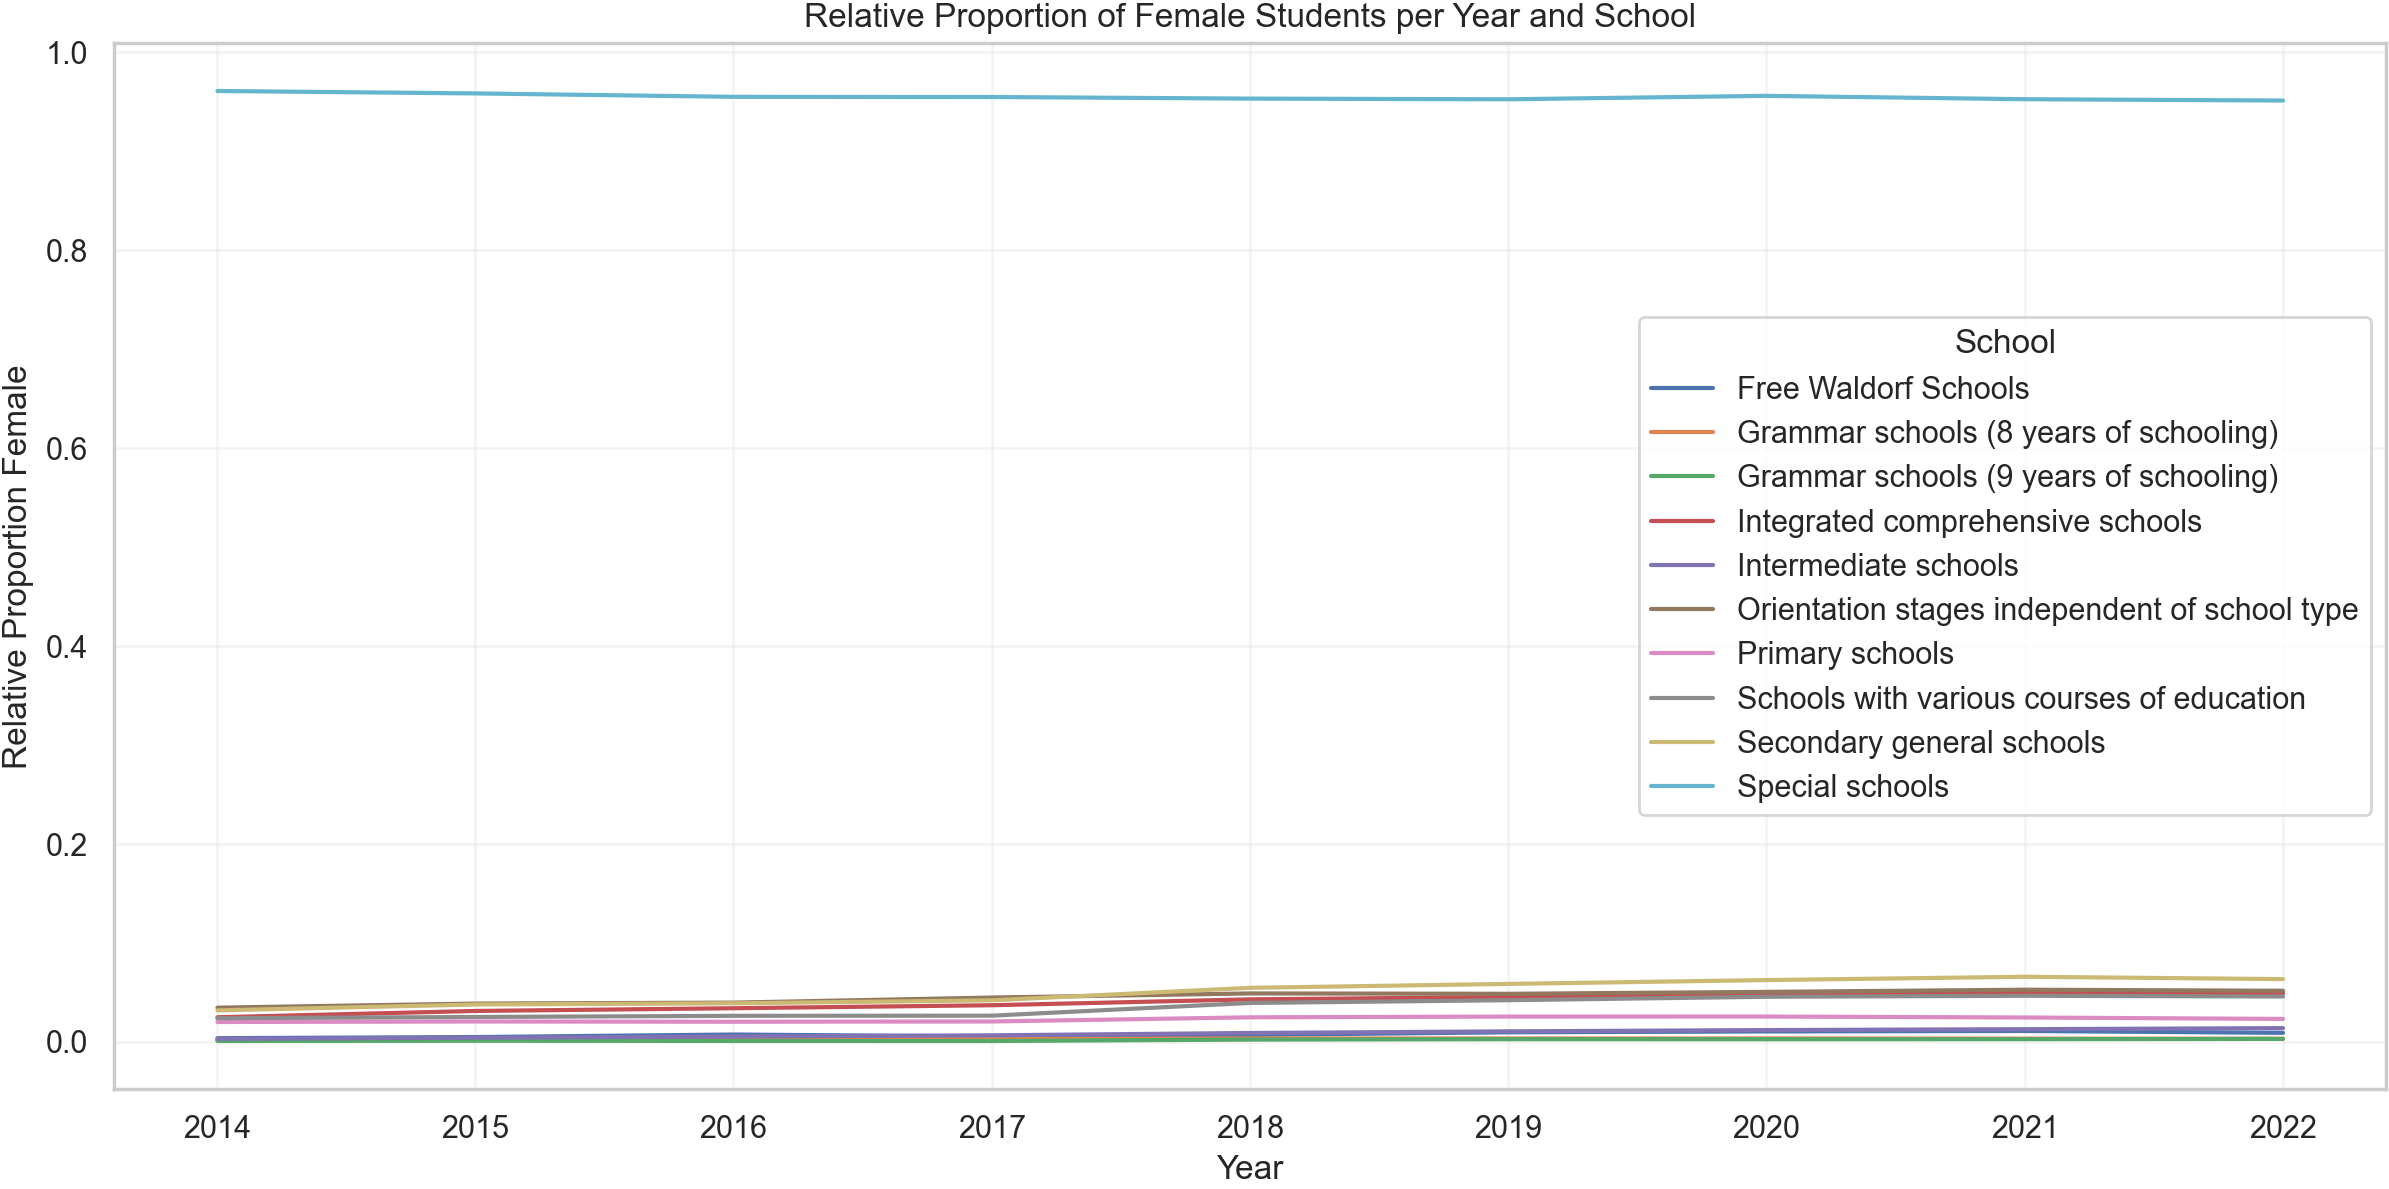

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Jetzt können Sie die Visualisierung durchführen


plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='relative_male', hue='school', data=merged_df)
plt.title('Relative Proportion of Male Students per Year and School')
plt.xlabel('Year')
plt.ylabel('Relative Proportion Male')
plt.legend(title='School')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='relative_female', hue='school', data=merged_df)
plt.title('Relative Proportion of Female Students per Year and School')
plt.xlabel('Year')
plt.ylabel('Relative Proportion Female')
plt.legend(title='School')

plt.show()

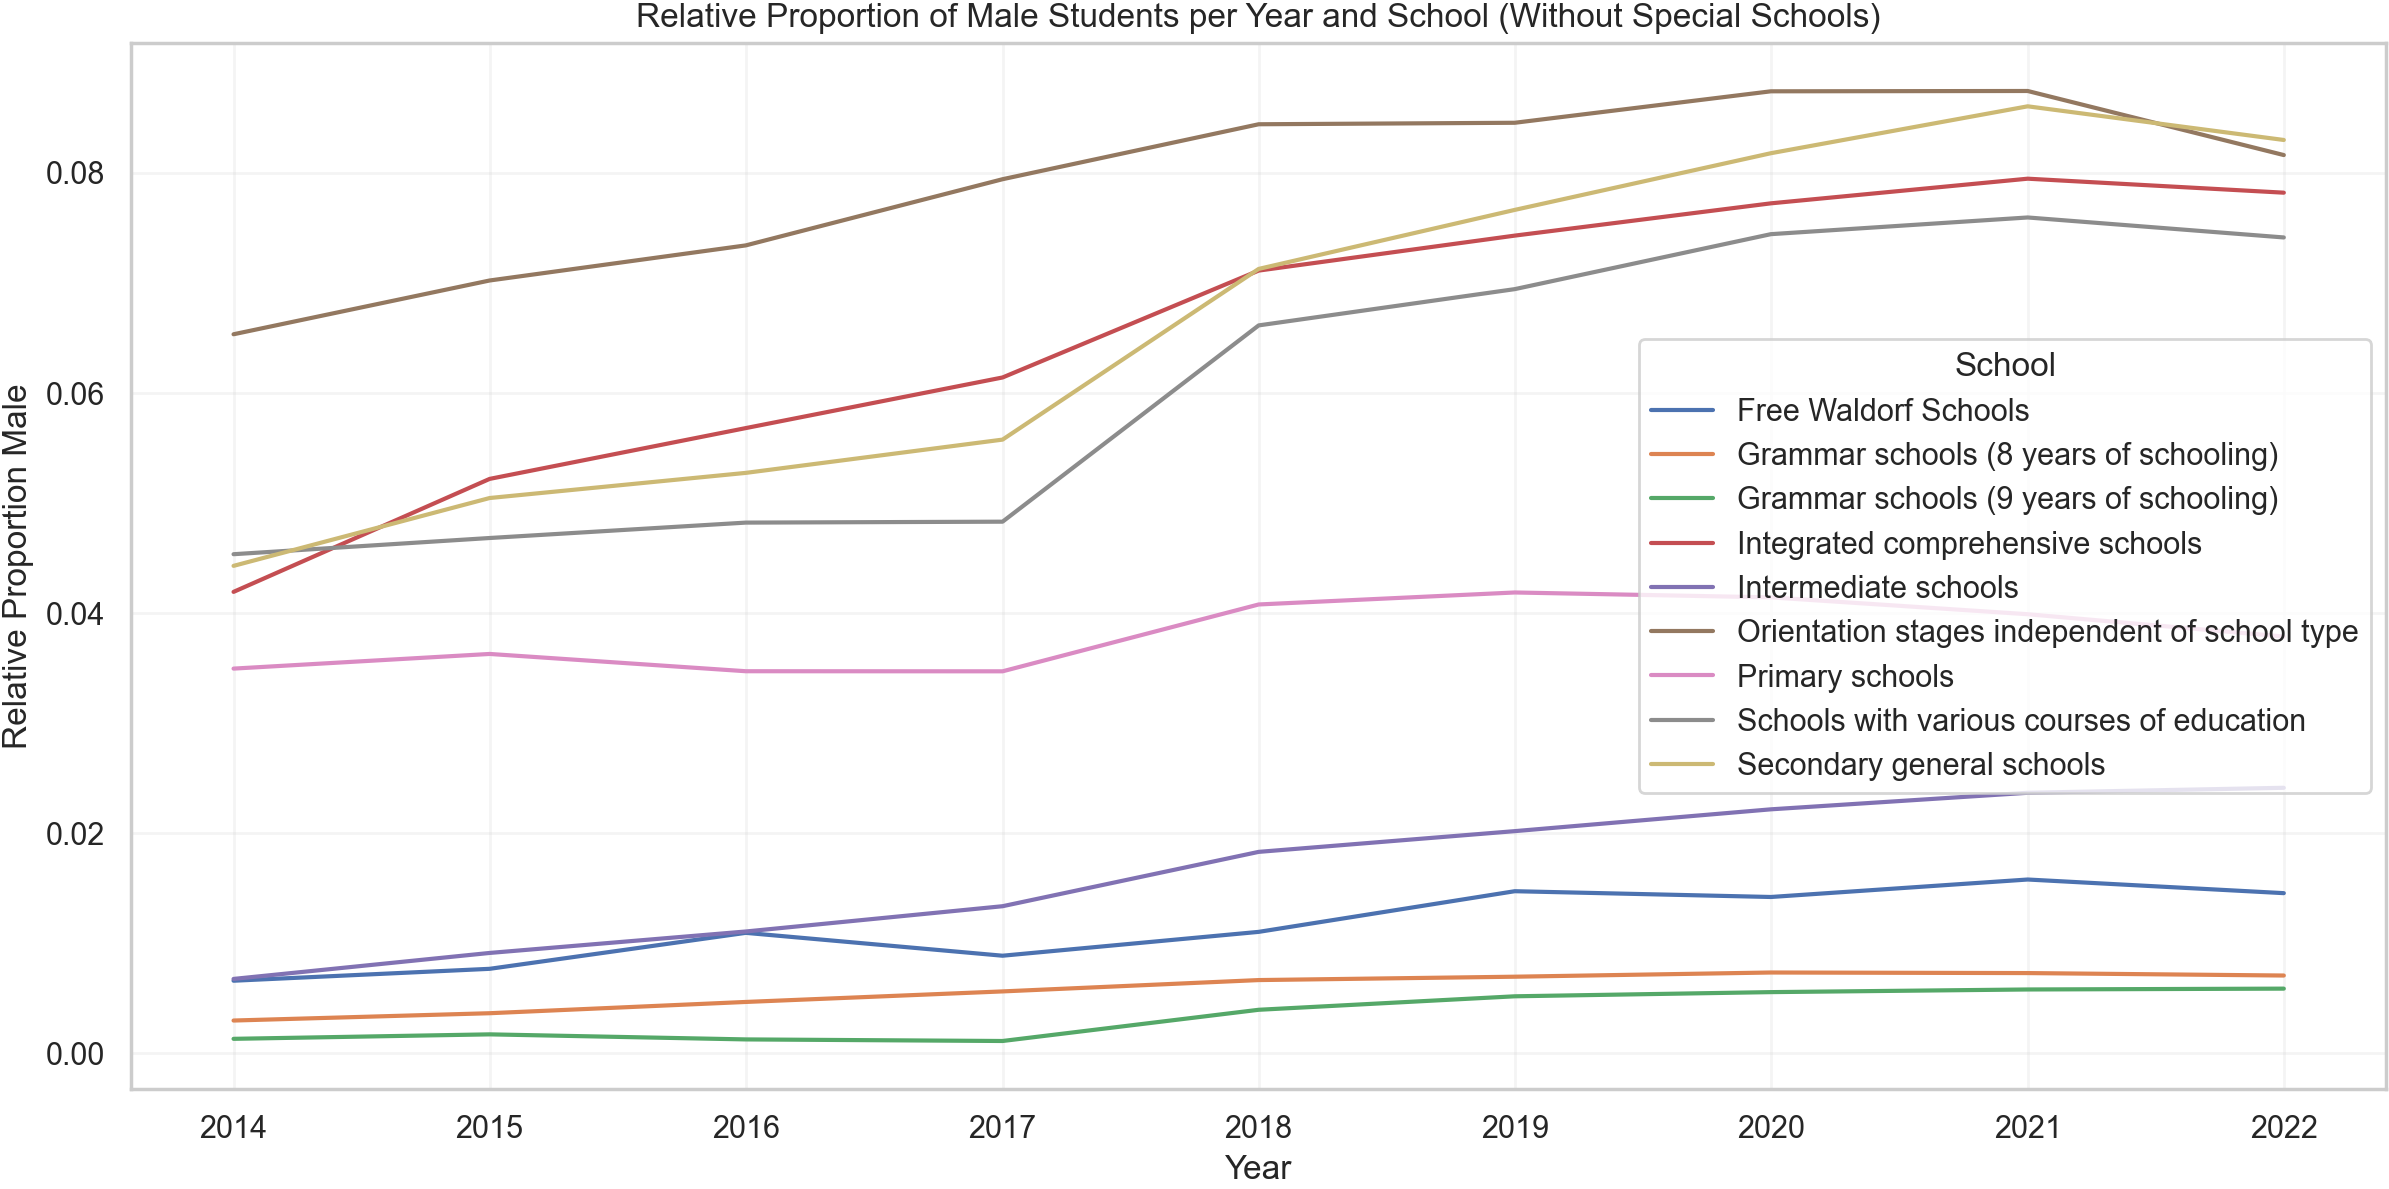

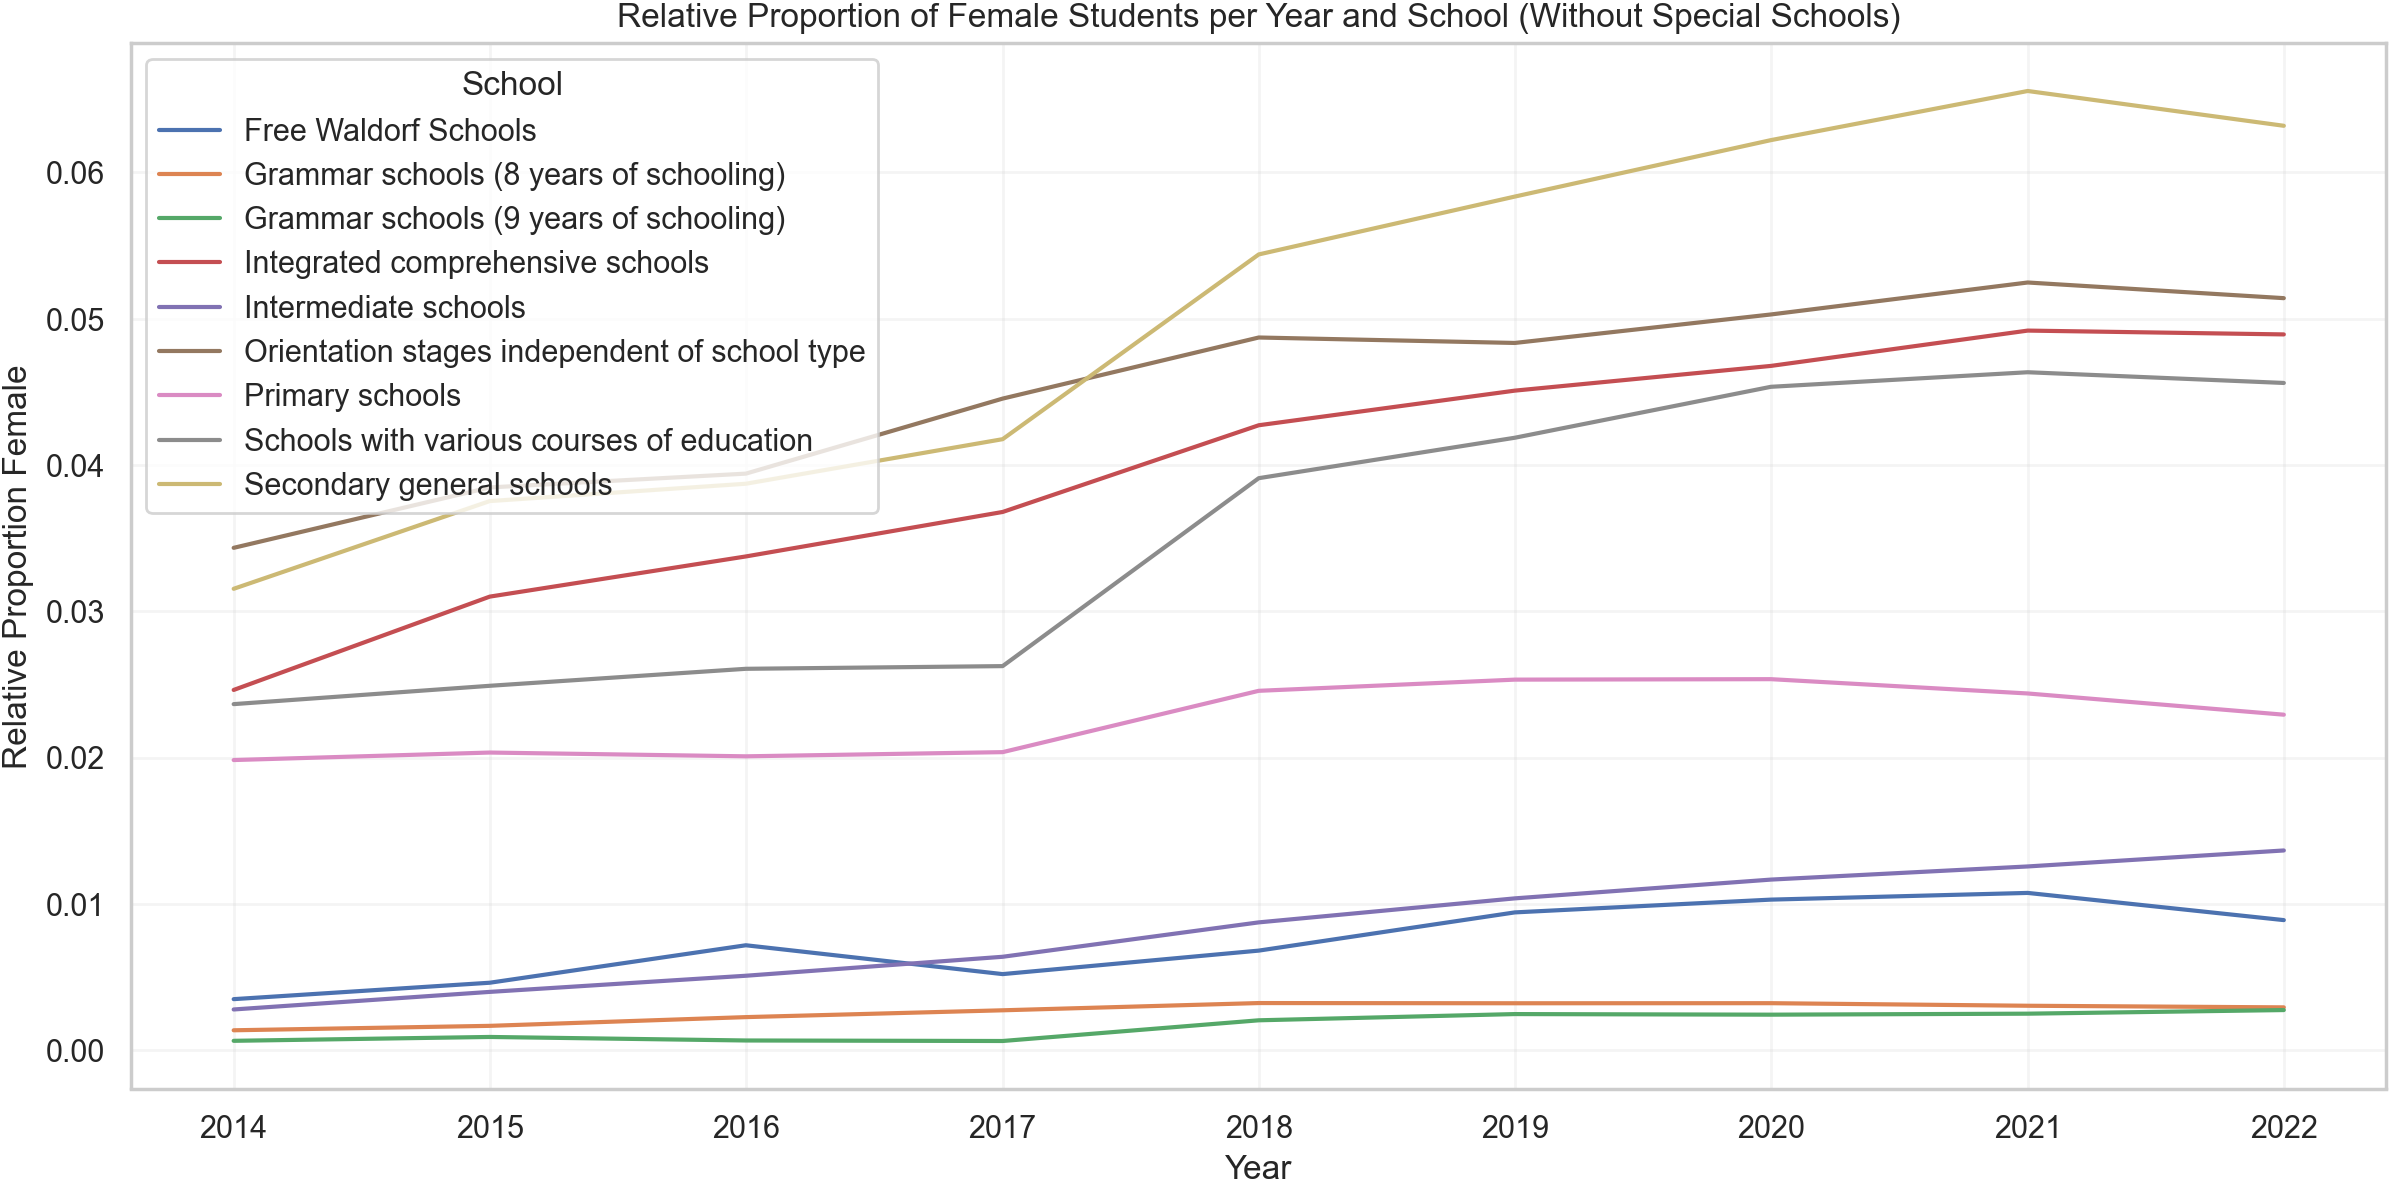

In [90]:
merged_df = load_special_edu_support_percentage(ignore_special_schools=True)

import matplotlib.pyplot as plt
import seaborn as sns

# Jetzt können Sie die Visualisierung durchführen


plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='relative_male', hue='school', data=merged_df)
plt.title('Relative Proportion of Male Students per Year and School (Without Special Schools)')
plt.xlabel('Year')
plt.ylabel('Relative Proportion Male')
plt.legend(title='School')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='relative_female', hue='school', data=merged_df)
plt.title('Relative Proportion of Female Students per Year and School (Without Special Schools)')
plt.xlabel('Year')
plt.ylabel('Relative Proportion Female')
plt.legend(title='School')

plt.show()